In [7]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mglearn


X.shape: (26, 2)


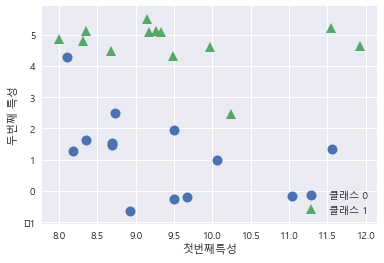

In [12]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel('첫번째특성')
plt.ylabel('두번째 특성')
print("X.shape: {}".format(X.shape))

In [25]:
y


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [11]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

(-3, 3)

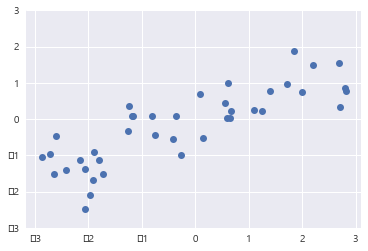

In [26]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)


In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [29]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [30]:
print('유방암 데이터의 형태: {}'.format(cancer.data.shape))
print('클래스 별 샘플 갯수 : \n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

유방암 데이터의 형태: (569, 30)
클래스 별 샘플 갯수 : 
{'malignant': 212, 'benign': 357}


# K-최근접 이웃 분류 알고리즘
- sklearn패키지의 KNeighborsClassifier 이용

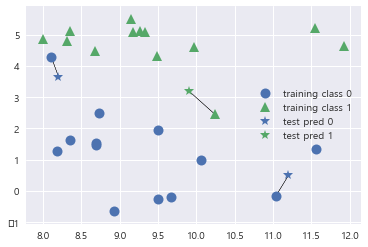

In [31]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

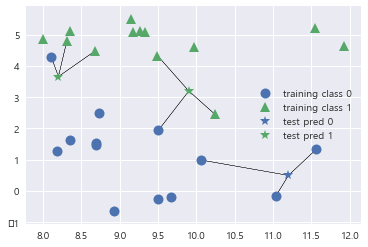

In [32]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [39]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


(19, 2)
(26, 2)
(7, 2)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("테스트 세트 예측 : {}".format(clf.predict(X_test)))
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


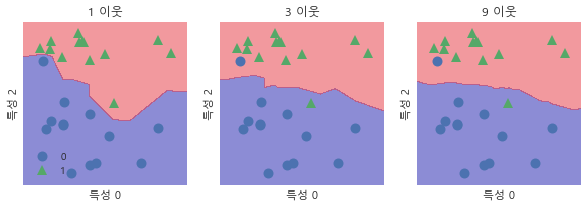

In [36]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbor, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbor))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

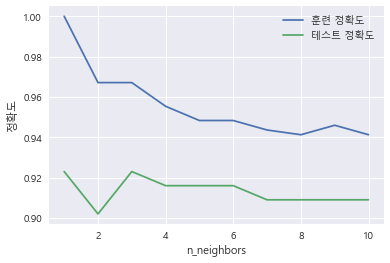

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지의 이웃 활용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트의 정확도
    training_accuracy.append(clf.score(X_train, y_train))
    #테스트 세트의 정확도
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = '훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# k-최근접 이웃 회귀

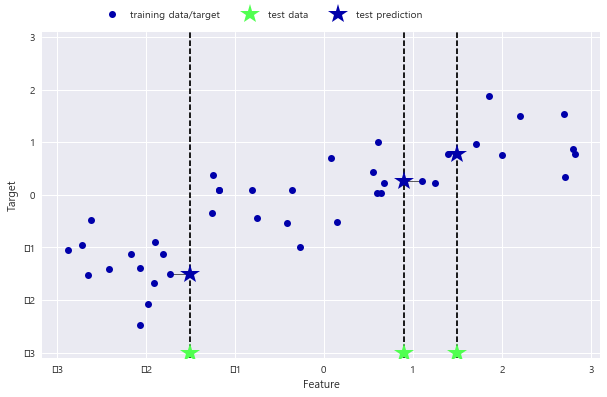

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors =1)

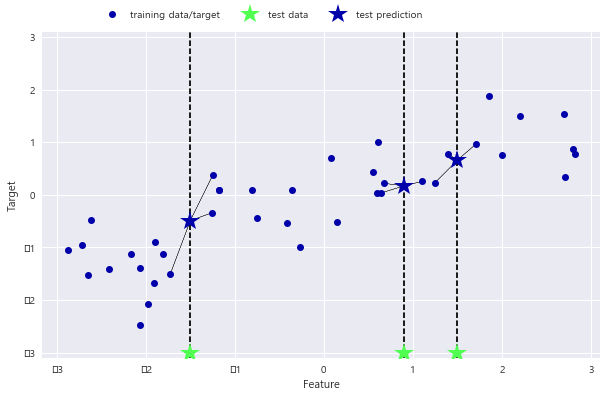

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors =3)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

reg = KNeighborsRegressor(n_neighbors= 3)

reg.fit(X_train, y_train)

print('테스트 세트 예측 : \n {}'.format(reg.predict(X_test)))
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


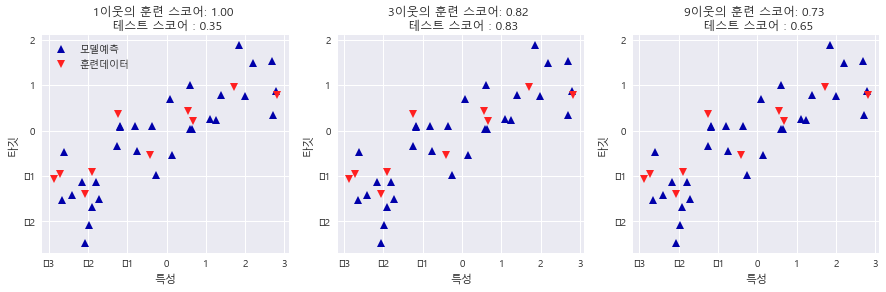

In [61]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
# -3과 3사이에 1000개의 샘플 만듬
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize = 8)
    
    ax.set_title('{}이웃의 훈련 스코어: {:.2f} \n 테스트 스코어 : {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델예측', '훈련데이터', '테스트 데이터'], loc='best')